## Importing the required modules

In [1]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.svm import SVC
import datetime as dt
import pandas as pd
import numpy as np

## Loading and Checking Data

In [2]:
df = pd.read_csv("Information.csv")
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In [3]:
df.shape

(20050, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

# Question 1:
    which is the 2nd most commonly used description by female?
    

In [5]:
df1 = df[df.gender == 'female']
df1['description'].value_counts()

Cos even an old girl's best friend is still her MUM!                                                                                                                       18
Do whatever makes you happy                                                                                                                                                10
��� I made a daisy chain from phrase, verse & punctuation ��� Send me a postcard from Paradise ��� BAZOOKA ESQUIMAU ��� Icon For Hire follow : 08/14-10/14 19/01/15 ���     7
Where would I be...If you didn't believe ��_ Justin Bieber followed me! ��_ 01/08/15                                                                                        7
I am an aspired musician and spiritualist. On this account, I sell my clothes!\nMy other account is: @CrystalledDream                                                       6
                                                                                                                                  

Answer:
 Do whatever makes you happy

# Question 2
    who retweeted the less number of times? male or female.
   

In [6]:
df['retweet_count'].value_counts()

0      19431
1        499
2         56
3         17
6          8
5          7
4          6
7          5
8          3
11         3
10         2
12         2
20         2
19         1
49         1
330        1
36         1
153        1
13         1
23         1
9          1
15         1
Name: retweet_count, dtype: int64

In [7]:
df2 = df[df.retweet_count == 0]

In [8]:
df2.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)


In [9]:
df2['gender'].value_counts()

female     6527
male       5970
brand      5746
unknown    1093
Name: gender, dtype: int64

Answer: Females retweeted less compared to male

## Feature Selection

In [10]:
df  = df[['_last_judgment_at', 'gender', 'gender:confidence', 'created', 'fav_number', 'name','retweet_count', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone']]
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,10/26/15 23:24,male,1.0000,12/5/13 1:48,0,sheezy0,0,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,10/26/15 23:30,male,1.0000,10/1/12 13:51,68,DavdBurnett,0,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,10/26/15 23:33,male,0.6625,11/28/14 11:30,7696,lwtprettylaugh,1,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,10/26/15 23:10,male,1.0000,6/11/09 22:39,202,douggarland,0,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,10/27/15 1:15,female,1.0000,4/16/14 13:23,37318,WilfordGemma,0,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _last_judgment_at  20000 non-null  object 
 1   gender             19953 non-null  object 
 2   gender:confidence  20024 non-null  float64
 3   created            20050 non-null  object 
 4   fav_number         20050 non-null  int64  
 5   name               20050 non-null  object 
 6   retweet_count      20050 non-null  int64  
 7   tweet_count        20050 non-null  int64  
 8   tweet_created      20050 non-null  object 
 9   tweet_id           20050 non-null  float64
 10  tweet_location     12559 non-null  object 
 11  user_timezone      12252 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


## Data Cleaning

Dropping rows with gender not equal to MALE or FEMALE

In [12]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1a4b6c14850>,
 [Text(-0.956842835737657, 0.542634119547895, 'Male'),
  Text(-0.06214367649417221, -1.0982432169022434, 'Female'),
  Text(1.056094185727833, 0.30767689362684636, 'Brand'),
  Text(0.1924625406271454, 1.0830319341807724, 'Unknown')],
 [Text(-0.521914274038722, 0.2959822470261245, '34%'),
  Text(-0.03389655081500302, -0.5990417546739508, '31%'),
  Text(0.5760513740333634, 0.16782376016009798, '30%'),
  Text(0.10497956761480658, 0.5907446913713302, '6%')])

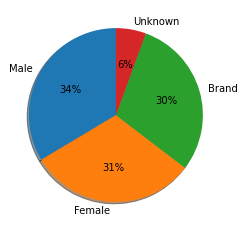

In [13]:
gender=["Male","Female","Brand", "Unknown"]
gender_values=[6700, 6194, 5942, 1117]
plt.pie(gender_values, labels=gender, autopct='%0.f%%', shadow=True, startangle=90)

In [14]:
df = df[(df.gender == 'male') | (df.gender == 'female')]
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,10/26/15 23:24,male,1.0000,12/5/13 1:48,0,sheezy0,0,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,10/26/15 23:30,male,1.0000,10/1/12 13:51,68,DavdBurnett,0,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,10/26/15 23:33,male,0.6625,11/28/14 11:30,7696,lwtprettylaugh,1,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,10/26/15 23:10,male,1.0000,6/11/09 22:39,202,douggarland,0,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,10/27/15 1:15,female,1.0000,4/16/14 13:23,37318,WilfordGemma,0,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In [15]:
df['gender'].value_counts()

female    6700
male      6194
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x1a4b6ca8a90>,
 [Text(-1.0979107443848168, -0.0677642779374028, 'Male'),
  Text(1.0979107380402624, 0.06776438073122534, 'Female')],
 [Text(-0.5988604060280819, -0.036962333420401526, '52%'),
  Text(0.5988604025674158, 0.03696238948975927, '48%')])

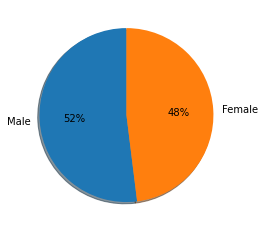

In [16]:
gender=["Male","Female"]
gender_values=[6700, 6194]
plt.pie(gender_values, labels=gender, autopct='%0.f%%', shadow=True, startangle=90)

## Optimizing Data

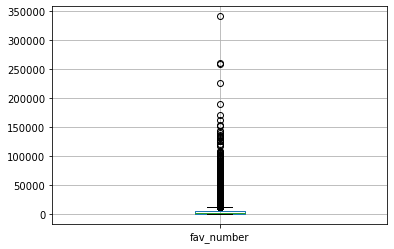

In [17]:
df.boxplot(column=["fav_number"])

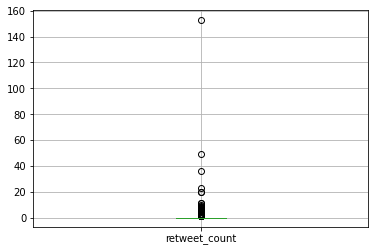

In [18]:
df.boxplot(column=["retweet_count"])

In [19]:
df["gender:confidence"].value_counts()

1.0000    10020
0.6691       18
0.6667       17
0.6678       16
0.6628       15
          ...  
0.6937        1
0.6296        1
0.8458        1
0.6383        1
0.3556        1
Name: gender:confidence, Length: 791, dtype: int64

Taking the rows with "fav_number" <= 15000, retweet_count" < 20, gender:confidence" > 0.7 only..

In [20]:
df=df[df["fav_number"]<=15000]
df=df[df["retweet_count"]<20]
df=df[df["gender:confidence"]>0.7]
df['gender:confidence'].value_counts()

1.0000    9123
0.7050       2
0.7037       2
0.7538       1
0.7047       1
0.9612       1
0.8472       1
0.8503       1
0.7012       1
0.7023       1
0.9613       1
0.8796       1
0.7005       1
0.8431       1
0.8458       1
Name: gender:confidence, dtype: int64

Droping rows with Null values

In [21]:
df = df.dropna()

In [22]:
df.shape

(4452, 12)

In [23]:
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,10/26/15 23:24,male,1.0,12/5/13 1:48,0,sheezy0,0,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
3,10/26/15 23:10,male,1.0,6/11/09 22:39,202,douggarland,0,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
5,10/27/15 1:47,female,1.0,3/11/10 18:14,3901,monroevicious,0,20036,10/26/15 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
9,10/27/15 1:49,female,1.0,5/13/11 3:32,3115,GabrieleNeher,0,26085,10/26/15 12:40,6.590000e+17,"Nottingham, England.",Amsterdam
17,10/26/15 22:50,male,1.0,10/18/09 11:41,5,SSmyth2010,0,91,10/26/15 12:40,6.590000e+17,Glasgow,London


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 0 to 19994
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _last_judgment_at  4452 non-null   object 
 1   gender             4452 non-null   object 
 2   gender:confidence  4452 non-null   float64
 3   created            4452 non-null   object 
 4   fav_number         4452 non-null   int64  
 5   name               4452 non-null   object 
 6   retweet_count      4452 non-null   int64  
 7   tweet_count        4452 non-null   int64  
 8   tweet_created      4452 non-null   object 
 9   tweet_id           4452 non-null   float64
 10  tweet_location     4452 non-null   object 
 11  user_timezone      4452 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 452.2+ KB


Changing 'created', 'tweet_created', '_last_judgment_at' columns Dtype to integer

In [25]:
df['created']= pd.to_datetime(df['created'])
df['_last_judgment_at']= pd.to_datetime(df['_last_judgment_at'])
df['tweet_created']= pd.to_datetime(df['tweet_created'])

extracting year, month etc from datatime datype and adding to dataset.

In [26]:
df['created_year'] = df['created'].dt.year
df['created_month'] = df['created'].dt.month
df['created_week'] = df['created'].dt.week
df['created_day'] = df['created'].dt.day
df['created_hour'] = df['created'].dt.hour
df['created_minute'] = df['created'].dt.minute
df['created_dayofweek'] = df['created'].dt.dayofweek

In [27]:
df['tweet_created_year'] = df['tweet_created'].dt.year
df['tweet_created_month'] = df['tweet_created'].dt.month
df['tweet_created_week'] = df['tweet_created'].dt.week
df['tweet_created_day'] = df['tweet_created'].dt.day
df['tweet_created_hour'] = df['tweet_created'].dt.hour
df['tweet_created_minute'] = df['tweet_created'].dt.minute
df['tweet_created_dayofweek'] = df['tweet_created'].dt.dayofweek

In [28]:
df['_last_judgment_at_year'] = df['_last_judgment_at'].dt.year
df['_last_judgment_at_month'] = df['_last_judgment_at'].dt.month
df['_last_judgment_at_week'] = df['_last_judgment_at'].dt.week
df['_last_judgment_at_day'] = df['_last_judgment_at'].dt.day
df['_last_judgment_at_hour'] = df['_last_judgment_at'].dt.hour
df['_last_judgment_at_minute'] = df['_last_judgment_at'].dt.minute
df['_last_judgment_at_dayofweek'] = df['_last_judgment_at'].dt.dayofweek

In [29]:
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,...,tweet_created_hour,tweet_created_minute,tweet_created_dayofweek,_last_judgment_at_year,_last_judgment_at_month,_last_judgment_at_week,_last_judgment_at_day,_last_judgment_at_hour,_last_judgment_at_minute,_last_judgment_at_dayofweek
0,2015-10-26 23:24:00,male,1.0,2013-12-05 01:48:00,0,sheezy0,0,110964,2015-10-26 12:40:00,6.590000e+17,...,12,40,0,2015,10,44,26,23,24,0
3,2015-10-26 23:10:00,male,1.0,2009-06-11 22:39:00,202,douggarland,0,1693,2015-10-26 12:40:00,6.590000e+17,...,12,40,0,2015,10,44,26,23,10,0
5,2015-10-27 01:47:00,female,1.0,2010-03-11 18:14:00,3901,monroevicious,0,20036,2015-10-26 12:40:00,6.590000e+17,...,12,40,0,2015,10,44,27,1,47,1
9,2015-10-27 01:49:00,female,1.0,2011-05-13 03:32:00,3115,GabrieleNeher,0,26085,2015-10-26 12:40:00,6.590000e+17,...,12,40,0,2015,10,44,27,1,49,1
17,2015-10-26 22:50:00,male,1.0,2009-10-18 11:41:00,5,SSmyth2010,0,91,2015-10-26 12:40:00,6.590000e+17,...,12,40,0,2015,10,44,26,22,50,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 0 to 19994
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   _last_judgment_at            4452 non-null   datetime64[ns]
 1   gender                       4452 non-null   object        
 2   gender:confidence            4452 non-null   float64       
 3   created                      4452 non-null   datetime64[ns]
 4   fav_number                   4452 non-null   int64         
 5   name                         4452 non-null   object        
 6   retweet_count                4452 non-null   int64         
 7   tweet_count                  4452 non-null   int64         
 8   tweet_created                4452 non-null   datetime64[ns]
 9   tweet_id                     4452 non-null   float64       
 10  tweet_location               4452 non-null   object        
 11  user_timezone                4452 non-null

predicting the gender by name column using nltk model and NaiveBayesClassifier

In [31]:
import random 
from nltk.corpus import names 
import nltk 
  
def gender_features(word): 
    return {'last_letter':word[-1]} 
   
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
             [(name, 'female') for name in names.words('female.txt')]) 
  
random.shuffle(labeled_names) 

featuresets = [(gender_features(n), gender)  
               for (n, gender)in labeled_names] 
train_set, test_set = featuresets[500:], featuresets[:500] 

classifier = nltk.NaiveBayesClassifier.train(train_set)
def finding_gender_by_name(name):
    gender = classifier.classify(gender_features(name))
    
    return gender

In [32]:
gender_by_name = []
for name in df.name: 
    gender = finding_gender_by_name(name)
    gender_by_name.append(gender)

In [33]:
df['gender_by_name'] = gender_by_name

In [34]:
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,...,tweet_created_minute,tweet_created_dayofweek,_last_judgment_at_year,_last_judgment_at_month,_last_judgment_at_week,_last_judgment_at_day,_last_judgment_at_hour,_last_judgment_at_minute,_last_judgment_at_dayofweek,gender_by_name
0,2015-10-26 23:24:00,male,1.0,2013-12-05 01:48:00,0,sheezy0,0,110964,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,24,0,female
3,2015-10-26 23:10:00,male,1.0,2009-06-11 22:39:00,202,douggarland,0,1693,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,10,0,male
5,2015-10-27 01:47:00,female,1.0,2010-03-11 18:14:00,3901,monroevicious,0,20036,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,47,1,male
9,2015-10-27 01:49:00,female,1.0,2011-05-13 03:32:00,3115,GabrieleNeher,0,26085,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,49,1,male
17,2015-10-26 22:50:00,male,1.0,2009-10-18 11:41:00,5,SSmyth2010,0,91,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,22,50,0,female


## Label Encoding

changing object Dtype to int using labelencoder for 'gender_by_name', 'tweet_location', 'user_timezone' columns

In [35]:
le = LabelEncoder()

In [36]:
df['gender_by_name'] = le.fit_transform(df['gender_by_name'])
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,...,tweet_created_minute,tweet_created_dayofweek,_last_judgment_at_year,_last_judgment_at_month,_last_judgment_at_week,_last_judgment_at_day,_last_judgment_at_hour,_last_judgment_at_minute,_last_judgment_at_dayofweek,gender_by_name
0,2015-10-26 23:24:00,male,1.0,2013-12-05 01:48:00,0,sheezy0,0,110964,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,24,0,0
3,2015-10-26 23:10:00,male,1.0,2009-06-11 22:39:00,202,douggarland,0,1693,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,10,0,1
5,2015-10-27 01:47:00,female,1.0,2010-03-11 18:14:00,3901,monroevicious,0,20036,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,47,1,1
9,2015-10-27 01:49:00,female,1.0,2011-05-13 03:32:00,3115,GabrieleNeher,0,26085,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,49,1,1
17,2015-10-26 22:50:00,male,1.0,2009-10-18 11:41:00,5,SSmyth2010,0,91,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,22,50,0,0


In [37]:
df['tweet_location'] = le.fit_transform(df['tweet_location'])
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,...,tweet_created_minute,tweet_created_dayofweek,_last_judgment_at_year,_last_judgment_at_month,_last_judgment_at_week,_last_judgment_at_day,_last_judgment_at_hour,_last_judgment_at_minute,_last_judgment_at_dayofweek,gender_by_name
0,2015-10-26 23:24:00,male,1.0,2013-12-05 01:48:00,0,sheezy0,0,110964,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,24,0,0
3,2015-10-26 23:10:00,male,1.0,2009-06-11 22:39:00,202,douggarland,0,1693,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,10,0,1
5,2015-10-27 01:47:00,female,1.0,2010-03-11 18:14:00,3901,monroevicious,0,20036,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,47,1,1
9,2015-10-27 01:49:00,female,1.0,2011-05-13 03:32:00,3115,GabrieleNeher,0,26085,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,49,1,1
17,2015-10-26 22:50:00,male,1.0,2009-10-18 11:41:00,5,SSmyth2010,0,91,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,22,50,0,0


In [38]:
df['user_timezone'] = le.fit_transform(df['user_timezone'])
df.head()

,_last_judgment_at,gender,gender:confidence,created,fav_number,name,retweet_count,tweet_count,tweet_created,tweet_id,...,tweet_created_minute,tweet_created_dayofweek,_last_judgment_at_year,_last_judgment_at_month,_last_judgment_at_week,_last_judgment_at_day,_last_judgment_at_hour,_last_judgment_at_minute,_last_judgment_at_dayofweek,gender_by_name
0,2015-10-26 23:24:00,male,1.0,2013-12-05 01:48:00,0,sheezy0,0,110964,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,24,0,0
3,2015-10-26 23:10:00,male,1.0,2009-06-11 22:39:00,202,douggarland,0,1693,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,23,10,0,1
5,2015-10-27 01:47:00,female,1.0,2010-03-11 18:14:00,3901,monroevicious,0,20036,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,47,1,1
9,2015-10-27 01:49:00,female,1.0,2011-05-13 03:32:00,3115,GabrieleNeher,0,26085,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,27,1,49,1,1
17,2015-10-26 22:50:00,male,1.0,2009-10-18 11:41:00,5,SSmyth2010,0,91,2015-10-26 12:40:00,6.590000e+17,...,40,0,2015,10,44,26,22,50,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 0 to 19994
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   _last_judgment_at            4452 non-null   datetime64[ns]
 1   gender                       4452 non-null   object        
 2   gender:confidence            4452 non-null   float64       
 3   created                      4452 non-null   datetime64[ns]
 4   fav_number                   4452 non-null   int64         
 5   name                         4452 non-null   object        
 6   retweet_count                4452 non-null   int64         
 7   tweet_count                  4452 non-null   int64         
 8   tweet_created                4452 non-null   datetime64[ns]
 9   tweet_id                     4452 non-null   float64       
 10  tweet_location               4452 non-null   int32         
 11  user_timezone                4452 non-null

Droping the columns whose dtype is changed to int dtype

In [40]:
df = df.drop(['name', '_last_judgment_at', 'created', 'tweet_created'], axis = 1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 0 to 19994
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       4452 non-null   object 
 1   gender:confidence            4452 non-null   float64
 2   fav_number                   4452 non-null   int64  
 3   retweet_count                4452 non-null   int64  
 4   tweet_count                  4452 non-null   int64  
 5   tweet_id                     4452 non-null   float64
 6   tweet_location               4452 non-null   int32  
 7   user_timezone                4452 non-null   int32  
 8   created_year                 4452 non-null   int64  
 9   created_month                4452 non-null   int64  
 10  created_week                 4452 non-null   int64  
 11  created_day                  4452 non-null   int64  
 12  created_hour                 4452 non-null   int64  
 13  created_minute   

## Diving the dataset into X, Y

In [42]:
X = df.drop('gender', axis = 1)

In [43]:
X.head()

,gender:confidence,fav_number,retweet_count,tweet_count,tweet_id,tweet_location,user_timezone,created_year,created_month,created_week,...,tweet_created_minute,tweet_created_dayofweek,_last_judgment_at_year,_last_judgment_at_month,_last_judgment_at_week,_last_judgment_at_day,_last_judgment_at_hour,_last_judgment_at_minute,_last_judgment_at_dayofweek,gender_by_name
0,1.0,0,0,110964,6.590000e+17,2884,42,2013,12,49,...,40,0,2015,10,44,26,23,24,0,0
3,1.0,202,0,1693,6.590000e+17,1837,93,2009,6,24,...,40,0,2015,10,44,26,23,10,0,1
5,1.0,3901,0,20036,6.590000e+17,1658,41,2010,3,10,...,40,0,2015,10,44,27,1,47,1,1
9,1.0,3115,0,26085,6.590000e+17,1742,11,2011,5,19,...,40,0,2015,10,44,27,1,49,1,1
17,1.0,5,0,91,6.590000e+17,940,74,2009,10,42,...,40,0,2015,10,44,26,22,50,0,0


In [44]:
Y = df['gender']

## Test and Train data Split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
accuracy_of_all_models=dict()

## AdaBoostClassifier

In [46]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_head=model.predict(x_test)
print("AdaBoostClassifier Accuracy:",model.score(x_test,y_test))

accuracy_of_all_models["AdaBoost"]=model.score(x_test,y_test)

AdaBoostClassifier Accuracy: 0.5847362514029181


## RandomForestClassifier

In [47]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_head=model.predict(x_test)
print("RandomForestClassifier Accuracy:",model.score(x_test,y_test))

accuracy_of_all_models["RandomForest"]=model.score(x_test,y_test)

RandomForestClassifier Accuracy: 0.6071829405162739


## ExtraTreesClassifier

In [48]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
y_head=model.predict(x_test)
print("ExtraTreesClassifier Accuracy:",model.score(x_test,y_test))

accuracy_of_all_models["ExtraTrees"]=model.score(x_test,y_test)

ExtraTreesClassifier Accuracy: 0.5768799102132436


## GradientBoostingClassifier

In [49]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_head=model.predict(x_test)
print("GradientBoostingClassifier Accuracy:",model.score(x_test,y_test))

accuracy_of_all_models["GradientBoosting"]=model.score(x_test,y_test)

GradientBoostingClassifier Accuracy: 0.5869809203142536


## Logistic Regression

In [50]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Logistic Regression Accuracy:",accuracy_score(y_pred,y_test))


accuracy_of_all_models["Logistic Regression"]=accuracy_score(y_pred,y_test)

Logistic Regression Accuracy: 0.510662177328844


## Support Vector Machine SVM

In [51]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print("SVM accuracy:",accuracy_score(y_test, y_pred))


accuracy_of_all_models["SVM"]=accuracy_score(y_test, y_pred)

SVM accuracy: 0.510662177328844


In [52]:
accuracy_of_all_models

{'AdaBoost': 0.5847362514029181,
 'RandomForest': 0.6071829405162739,
 'ExtraTrees': 0.5768799102132436,
 'GradientBoosting': 0.5869809203142536,
 'Logistic Regression': 0.510662177328844,
 'SVM': 0.510662177328844}

In [53]:
keys = accuracy_of_all_models.keys()
values = accuracy_of_all_models.values()
accuracy_of_all_models.update((x, y*100) for x, y in accuracy_of_all_models.items())

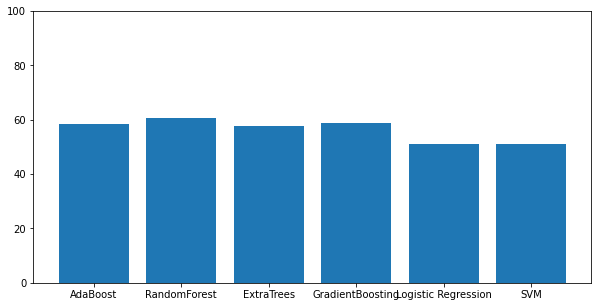

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.ylim(0,100)
plt.bar(keys, values)
plt.show()

## RandomForestClassifier has given the highest accuracu (58% - 60%).